# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [ ]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [ ]:
x_train.shape, y_train.shape ## 28 x 28 짜리 데이터가 60000개

((60000, 28, 28), (60000,))

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

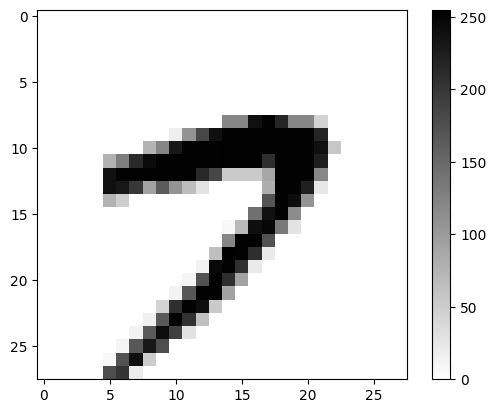

In [ ]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 91

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [ ]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 121, 121, 240, 253, 218, 121, 121,  44,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 107, 184, 240, 253, 252, 252, 252, 252, 252, 252, 219,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  75, 122, 230, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 239,  56,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  77, 129, 213, 244, 252, 252, 252, 252, 252, 253, 252, 252, 209, 252, 252, 252, 225,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 240, 252, 252, 252, 252, 252, 252, 213, 185,  53,  53,  53,  89, 252, 252, 252, 120,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 240, 232, 198,  93, 164, 108,  66,  28,   0,   0,   0,   0,  81, 252, 252, 222,  24,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  76,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 171, 252, 243, 108,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 144, 238, 252, 115,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,  70, 241, 248, 133,  28,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 121, 252, 252, 172,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 255, 253, 209,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 246, 253, 207,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10, 172, 252, 209,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 168, 252, 252,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 208, 252, 241,  53,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  15, 166, 252, 204,  62,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  13, 166, 243, 191,  29,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  10, 168, 231, 177,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   6, 172, 241,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
# 넘파이를 잘보이게 옵션추가
np.set_printoptions(linewidth= np.inf)

x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 121, 121, 240, 253, 218, 121, 121,  44,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 107, 184, 240, 253, 252, 252, 252, 252, 252, 252, 219,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  75, 122, 230, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 239,  56,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  77, 129, 213, 244, 252, 252, 252, 252, 252, 253, 252, 252, 209, 252, 252, 252, 225,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 240, 252, 252, 252, 252, 252, 252, 213, 185,  53,  53,  53,  89, 252, 252, 252, 120,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 240, 232, 198,  93, 164, 108,  66,  28,   0,   0,   0,   0,  81, 252, 252, 222,  24,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  76,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 171, 252, 243, 108,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 144, 238, 252, 115,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,  70, 241, 248, 133,  28,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 121, 252, 252, 172,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 255, 253, 209,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 246, 253, 207,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10, 172, 252, 209,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 168, 252, 252,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 208, 252, 241,  53,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  15, 166, 252, 204,  62,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  13, 166, 243, 191,  29,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  10, 168, 231, 177,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   6, 172, 241,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

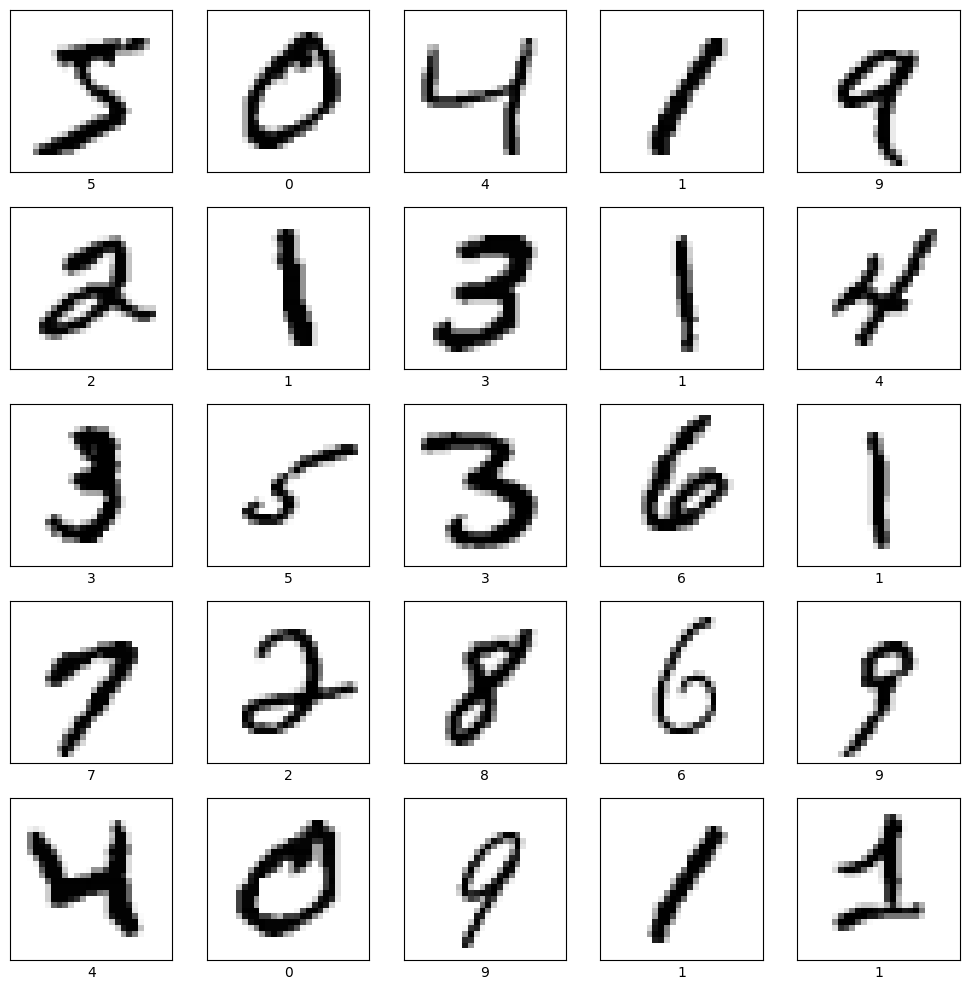

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
a, a.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [ ]:
# reshape
print(a.reshape(3,2))
print(a.reshape(6,1))
print(a.reshape(6, -1)) # 열 -1 알아서 계산

[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [ ]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [ ]:
x_train.shape, x_val.shape # 2차원 데이터셋

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨

In [ ]:
x_train = x_train / 255. # . 하면 float 타입
x_val = x_val / 255.

## 4.모델링

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

784

In [ ]:
clear_session()

model = Sequential(Dense(10, input_shape = (nfeatures,), activation = 'softmax')) # 0~9 분류해야되서 10

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5164 - val_loss: 0.3196
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3181 - val_loss: 0.2901
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2930 - val_loss: 0.2766
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2812 - val_loss: 0.2682
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2736 - val_loss: 0.2683
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2681 - val_loss: 0.2667
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2636 - val_loss: 0.2650
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2602 - val_loss: 0.2610
Epoch 9/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2572 - val_loss: 0.2630
Epoch 10/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.255

* 학습결과 그래프

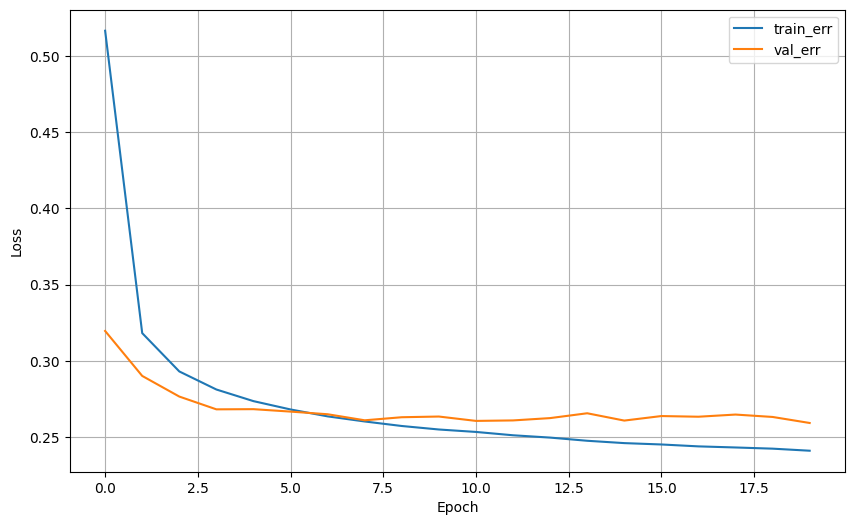

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model.predict(x_val)
pred[:5]

313/313 [==============================] - 0s 1ms/step


array([[4.2516984e-08, 9.4058272e-14, 3.6675027e-07, 5.2833077e-03, 1.2777711e-07, 1.6593942e-05, 4.5814009e-15, 9.9445903e-01, 7.6701990e-06, 2.3284882e-04],
       [2.4422034e-05, 6.2444519e-06, 9.9752814e-01, 3.9007973e-06, 1.5770850e-16, 2.1970821e-04, 2.2066669e-03, 2.2708751e-21, 1.0900554e-05, 2.8515054e-18],
       [6.3589960e-07, 9.8567224e-01, 9.0635624e-03, 1.3162240e-03, 8.0846308e-05, 5.7489058e-04, 4.2260849e-04, 5.8056747e-05, 2.6591774e-03, 1.5176272e-04],
       [9.9993527e-01, 5.4125402e-12, 1.5205275e-05, 1.3462297e-06, 9.8834203e-09, 1.3760672e-05, 2.7867050e-05, 2.5218590e-06, 1.7344405e-06, 2.3443224e-06],
       [4.2279012e-04, 4.2490413e-08, 1.7284903e-03, 1.0890458e-05, 9.7703642e-01, 4.5581543e-05, 1.0617935e-03, 1.3048847e-03, 2.3802605e-03, 1.6008928e-02]], dtype=float32)

In [ ]:
pred_1 = pred.argmax(axis=1)
pred_1

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 964    0    0    2    1    5    5    2    1    0]
 [   0 1115    3    3    0    1    3    2    8    0]
 [   5    9  934   16    5    3   11    8   37    4]
 [   3    0   18  926    0   23    2    9   22    7]
 [   2    1    9    2  910    0    7    4    9   38]
 [   9    2    4   37    5  779   12    7   30    7]
 [  12    3    9    2    7   14  908    1    2    0]
 [   1    6   25    7    6    1    0  951    2   29]
 [   7    7    7   20    7   25    8    8  877    8]
 [  11    7    1   11   20    7    0   20    7  925]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.92      0.91      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.95      0.93      0.94       982
           5       0.91      0.87      0.89       892
           6       0.95      0.95      0.95       958
           7       0.94      0.93   

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

In [67]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

In [68]:
# 스케일링
x_train = x_train / 255.
x_val = x_val / 255.

In [69]:
# 모델링
nfeatures = x_train.shape[1]
nfeatures

784

In [82]:
clear_session()

model = Sequential([Dense(32, input_shape = (nfeatures,), activation = 'relu'),
                   Dense(16, activation = 'relu'),
                   Dense(10, activation = 'softmax')
                   ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25818 (100.85 KB)
Trainable params: 25818 (100.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 1.4259 - val_loss: 0.8021
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6880 - val_loss: 0.5460
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5118 - val_loss: 0.4449
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4395 - val_loss: 0.3961
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4050 - val_loss: 0.3778
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3825 - val_loss: 0.3687
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3644 - val_loss: 0.3387
Epoch 8/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3496 - val_loss: 0.3272
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3373 - val_loss: 0.3167
Epoch 10/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.326

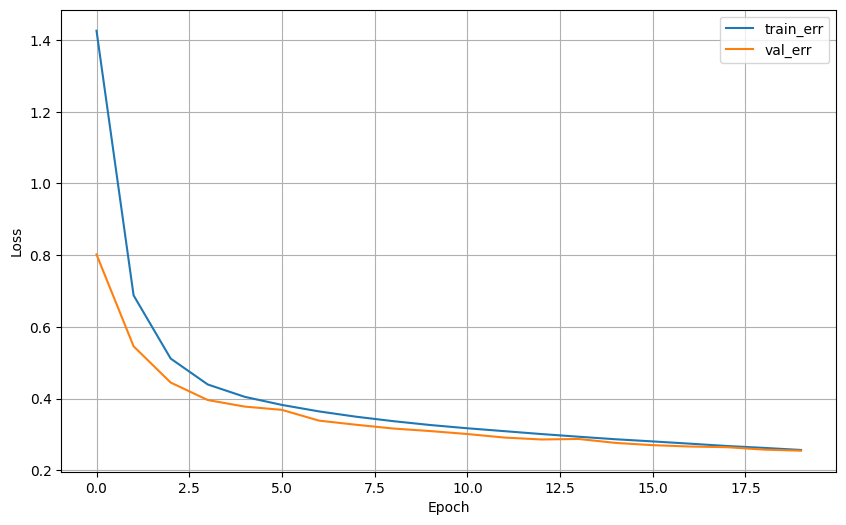

In [84]:
# 결과 그래프
dl_history_plot(history)

In [85]:
# 예측, 평가
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

313/313 [==============================] - 1s 2ms/step
[[ 951    0   11    1    0    5    8    3    1    0]
 [   0 1110    6    1    1    2    3    2   10    0]
 [   9    6  962    7    4    0   12   12   16    4]
 [   0    1   31  909    0   26    2   16   22    3]
 [   1    2    7    0  932    0   14    4    3   19]
 [  13    2    6   41    9  749   28   11   27    6]
 [   8    3    5    0    5    7  927    0    3    0]
 [   4    8   22    6    4    0    0  961    1   22]
 [   6   13    9   23   12   30   22   13  835   11]
 [  13    8    1   11   49    5    0   15    7  900]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.91      0.93      0.92      1032
           3       0.91      0.90      0.90      1010
           4       0.92      0.95      0.93       982
           5       0.91      0.84      0.87       892
           6       0.91      0.97  

### (2) 모델2

In [78]:
clear_session()

model = Sequential([Dense(20, input_shape = (nfeatures,), activation = 'relu'),
                   Dense(10, activation = 'softmax')
                   ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.8331 - val_loss: 1.2596
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9937 - val_loss: 0.7754
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7017 - val_loss: 0.5942
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5711 - val_loss: 0.4993
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4979 - val_loss: 0.4444
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4522 - val_loss: 0.4084
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4212 - val_loss: 0.3837
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3987 - val_loss: 0.3664
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3817 - val_loss: 0.3515
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.367

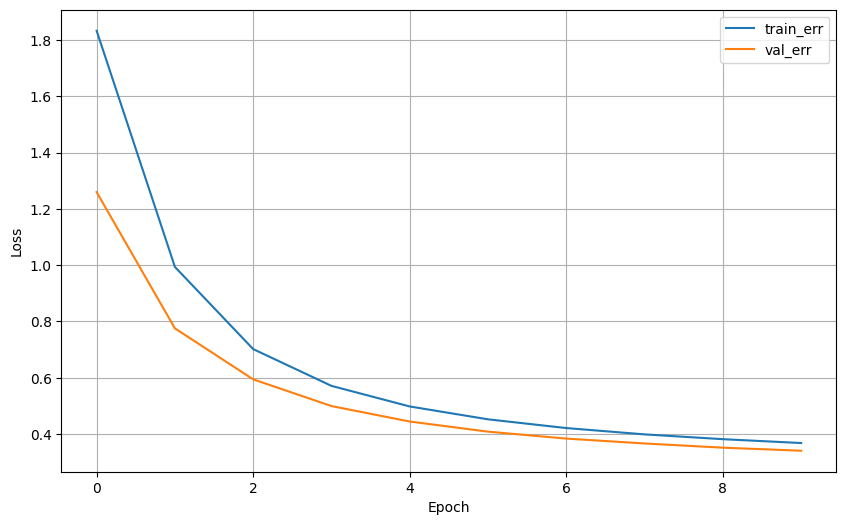

In [80]:
# 결과 그래프
dl_history_plot(history)

In [81]:
# 예측, 평가
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

313/313 [==============================] - 1s 2ms/step
[[ 952    0    4    1    0   13    7    1    2    0]
 [   0 1106    1    3    0    1    4    2   18    0]
 [  13   12  902   13   15    4   17   11   42    3]
 [   3    3   24  883    0   40    2   18   29    8]
 [   1    5    6    0  913    2   13    1    6   35]
 [  13    3    5   46   11  749   18   10   31    6]
 [  15    3    7    0   12   20  895    0    6    0]
 [   3   21   23    3    7    0    0  928    3   40]
 [   7    8   11   20   12   34   14    4  844   20]
 [  10    5    5   11   48   11    0   34   10  875]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       980
           1       0.95      0.97      0.96      1135
           2       0.91      0.87      0.89      1032
           3       0.90      0.87      0.89      1010
           4       0.90      0.93      0.91       982
           5       0.86      0.84      0.85       892
           6       0.92      0.93  